In [3]:
import argparse
from enum import Enum
import io
from PIL import Image as PilImage, ImageDraw
import json

# Google APIs
from google.cloud import vision
from google.cloud.vision import types

from IPython.core.display import Image, display

In [4]:
# Some config
image_file_name = "cajun-potato-salad.jpg"

class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5

client = vision.ImageAnnotatorClient()

In [5]:
def get_document_bounds(document):
    symbol_bounds = []
    word_bounds = []
    para_bounds = []
    block_bounds = []
    page_bounds = []
    
    # Collect specified feature bounds by enumerating all document features
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        symbol_bounds.append(symbol.bounding_box)
                    word_bounds.append(word.bounding_box)
                para_bounds.append(paragraph.bounding_box)
            block_bounds.append(block.bounding_box)
        page_bounds.append(block.bounding_box)
    # The list `bounds` contains the coordinates of the bounding boxes.
    return symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds

In [24]:
def render_doc_text(filein_name, document):
    image = PilImage.open(filein_name)
    draw = draw_image(image)
    symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds = get_document_bounds(document)
    draw_boxes(draw, page_bounds, 'blue')
    draw_boxes(draw, block_bounds, 'red')
    draw_boxes(draw, para_bounds, 'yellow')
    return image

In [7]:
def get_document_from_image(filein):
    """Sends the image to Google Vision API to get the annotations"""
    image = types.Image(content=content)
    response = client.document_text_detection(image=image)
    document = response.full_text_annotation
    return document

In [8]:
def draw_image(image):
    """Draws the image to be annotated"""
    return ImageDraw.Draw(image)

In [12]:
def draw_boxes(draw, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    
    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return draw

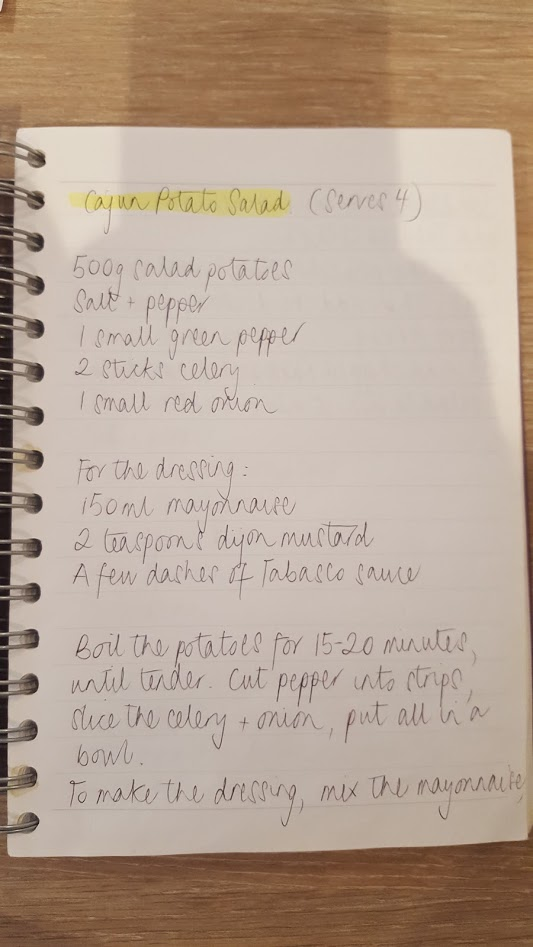

In [10]:
# Read image file
display(Image(image_file_name))
with io.open(image_file_name, 'rb') as image_file:
    content = image_file.read()




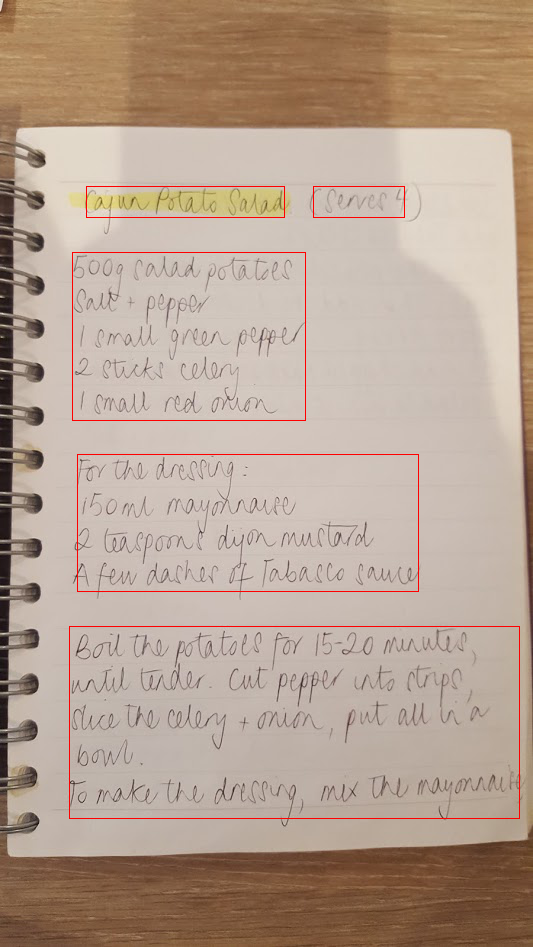

5

73

5

1

In [25]:
document = get_document_from_image(content)
image_with_bounds = render_doc_text(image_file_name, document)
display(image_with_bounds)

symbol_bounds, word_bounds, para_bounds, block_bounds, page_bounds = get_document_bounds(document)
display(len(block_bounds))
display(len(word_bounds))
display(len(para_bounds))
display(len(page_bounds))

In [48]:
display(document)

pages {
  property {
    detected_languages {
      language_code: "en"
      confidence: 0.8899999856948853
    }
    detected_languages {
      language_code: "fr"
      confidence: 0.05000000074505806
    }
    detected_languages {
      language_code: "la"
      confidence: 0.03999999910593033
    }
    detected_languages {
      language_code: "pl"
      confidence: 0.019999999552965164
    }
  }
  width: 533
  height: 947
  blocks {
    bounding_box {
      vertices {
        x: 86
        y: 186
      }
      vertices {
        x: 284
        y: 186
      }
      vertices {
        x: 284
        y: 217
      }
      vertices {
        x: 86
        y: 217
      }
    }
    paragraphs {
      bounding_box {
        vertices {
          x: 86
          y: 186
        }
        vertices {
          x: 284
          y: 186
        }
        vertices {
          x: 284
          y: 217
        }
        vertices {
          x: 86
          y: 217
        }
      }
      words {
    